# Assignment 3

# Please save your file with your name.ipynb and share this Jupter notebook with solutions

In [ ]:
# Question 1
# What is the difference between continuous and discrete random variable?

In [ ]:
#Answer 1
#Discrete random variable: Has fixed set of values :Example Head/Tail in tosing a coin
#Continuios Variable will have any values possiblities are infinite :Example Salary of a person in a particular city

In [ ]:
# Question 2
# What is inter quartile range?

In [ ]:
#Answer 2
#The interquartile range (IQR) is a measure of statistical dispersion, IQR=Q3-Q1 i.e 75th percentile -25th percentile

In [ ]:
# Question 3
# How we can impute missing values for numerical and categorical features.

In [ ]:
#Answer 3
#For Numerical : By mean but this is outliner senstive , If outliner are more then can got with Median
#categorical : Mode , Most occurence value in the dataset

In [ ]:
# Question 4
# What is the significance of p-value


In [ ]:
#Answer 4
# P -value determines wheather Null Hypothsis (H0) is rejected or Alternate Hypothesis(H1) can be considered
#p value Less than 0.05 means 5 % chance That H0 is correct and 95% chance H1 is correct

In [ ]:
# Questions 5
# If your numerical data has outliers how you would progress with missing value imputation?


In [ ]:
#Answer 5
#using Median

In [ ]:
# Question 6
# What is contingency table in chi-square test?


In [ ]:
#Answer 6
#Number of posssible outcome  scenarios and frequercy of that variable occurences  and their weights 

In [ ]:
# Question 7
# Company wants to understand whether older version of newer version of product is better for the market based on customer reviews
# How would you prove that older/newer version is better statistically?


In [ ]:
#Answer 7
# A/B TEsting
# Welch t-test to get p-value , and check null / Alternate Hypothisis is accurate

In [ ]:
# Question 8
# What is the difference between sample and population?


In [ ]:
#Answer 8
#Sample is a small subset of population
#population is entire data some times huge or infinite data set

In [ ]:
# Question 9
# How would you decide product placement in DMart store if you have purchase data of 10,000 transactions
# Which factors are important to increase the sales based on product placement?



In [ ]:
#Answer 9
#Market based Analysis-Apriori Algorithm
# Confidence & Lift values

In [ ]:
# Question 10
# Explain the difference between correlation and causation with example. 

In [ ]:
#Answer 10
#Correlation:The value of Y variable depends on X
#Causation:The occurence of one things causes  occurence of other thing 
#Causation Hot Weather use of A/C Causation
#Use of A/C power consumtion high , Power bill High , Correlation between more A/c use more Power bill

In [ ]:
#Question 11
# Use Hotel reservations data from the sessions and solve following
# Does 'market_segment_type' have any impact on booking cancellation?
# Does 'no_of_special_requests' have any impact on booking cancellation?

# clue: use hypothesis testing

In [1]:
import pandas as pd
data = pd.read_csv("Hotel Reservations.csv")
data.head(10)
data.info()
#Picking only required columns
data = data[['no_of_special_requests' ,'market_segment_type','lead_time','avg_price_per_room','booking_status']]
data['booking_status'].value_counts()
data['no_of_special_requests'].value_counts()
data['market_segment_type'].value_counts()
data['no_of_special_requests'].value_counts()

#Only Required feature columns as seprate data frame 
categorical_columns = ['no_of_special_requests' ,'market_segment_type']

#Chi-Square test
from scipy.stats import chi2_contingency

  
# defining the table
for column in categorical_columns:
        temp = pd.DataFrame(data[column].value_counts()).reset_index()
        temp.columns = [column,'frequency']
        categories = list(temp[temp['frequency']>20][column])
        data_new = data[data[column].isin(categories)]
        print(data_new[column].value_counts())
        
        table = pd.crosstab(data_new[column], data_new['booking_status'])
        print(table)
        stat, p, dof, expected = chi2_contingency(table)
        print("Chi-square test for feature: ", column)
        print("p-value : ", p)
        print("dof :",dof)
        print("")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# H0 = no_of_special_requests is not having any pattern with booking_status
# H0 = no_of_special_requests is not imp feature for booking_status
#p<0.05 - rejecting our H0
#accepting H1 = no_of_special_requests is imp feature for booking status

# H0 = market_segment_type is not having any pattern with booking_status
# H0 = market_segment_type is not imp feature for booking_status
#p<0.05 - rejecting our H0
#accepting H1 = market_segment_type is imp feature for booking status

In [ ]:
#Question 12
# Use Hotel reservations data from the sessions and solve following
# Is there any correlation between 'lead_time' and 'avg_price_per_room'?
# If 'arrival_date' is after 25th of any month is there higher or lower cancellation rate a compareto first 25 days of the month? 



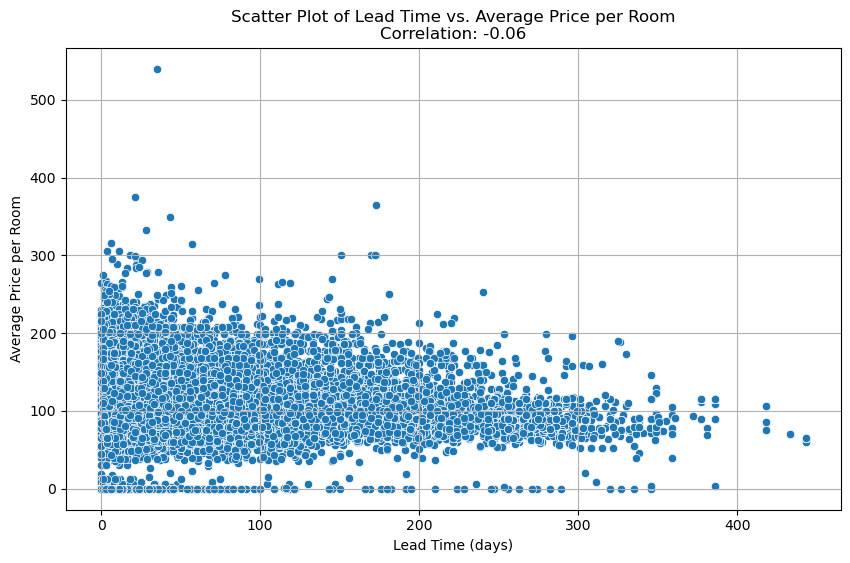

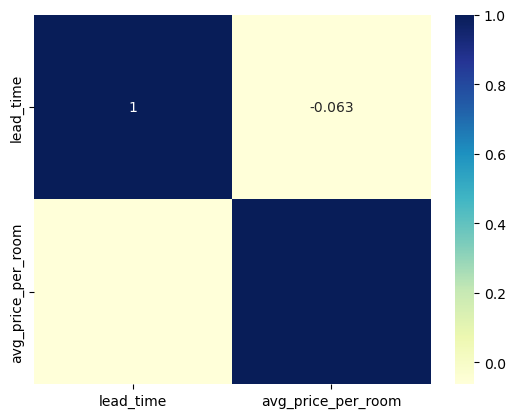

-0.06259646546936104

In [34]:
data1=pd.read_csv("Hotel Reservations.csv")
data1.head(5)
data1 = data1[[ 'arrival_month','arrival_date','lead_time','avg_price_per_room','booking_status']]
data1.head(5)
data1['arrival_date'].value_counts().reset_index()
data1['lead_time'].value_counts().reset_index()
data1['avg_price_per_room'].value_counts().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient
correlation = data1['lead_time'].corr(data1['avg_price_per_room'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='avg_price_per_room', data=data1)
plt.title(f'Scatter Plot of Lead Time vs. Average Price per Room\nCorrelation: {correlation:.2f}')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Price per Room')
plt.grid(True)
plt.show()


# plotting correlation heatmap
dataplot = sns.heatmap(data1[['lead_time', 'avg_price_per_room']].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

        print ("Cancelation rate is lower if booked before 25th")

correlation



In [32]:
# Create a new column to indicate if the arrival date is after the 25th
data1['after_25th'] = data1['arrival_date'] > 25

# Calculate cancellation rates for both groups
cancellation_rate_before_25th = data1[data1['after_25th'] == False]['booking_status'].value_counts(normalize=True).get('Canceled', 0)
cancellation_rate_after_25th = data1[data1['after_25th'] == True]['booking_status'].value_counts(normalize=True).get('Canceled', 0)

cancellation_rate_before_25th, cancellation_rate_after_25th
def cancellation_rates():
    if cancellation_rate_before_25th>cancellation_rate_after_25th:
        print ("Cancelation rate is higher if booked before 25th")
    else:
        print ("Cancelation rate is lower if booked before 25th")
            
cancellation_rates()   


Cancelation rate is lower if booked before 25th


In [ ]:
#Question 13
# Use Hotel reservations data from the sessions and solve following
# Draw histogram with 20 bins for 'lead_time' and 'avg_price_per_room'?
# Use matplotlib and draw it
# then use seaborn and draw it


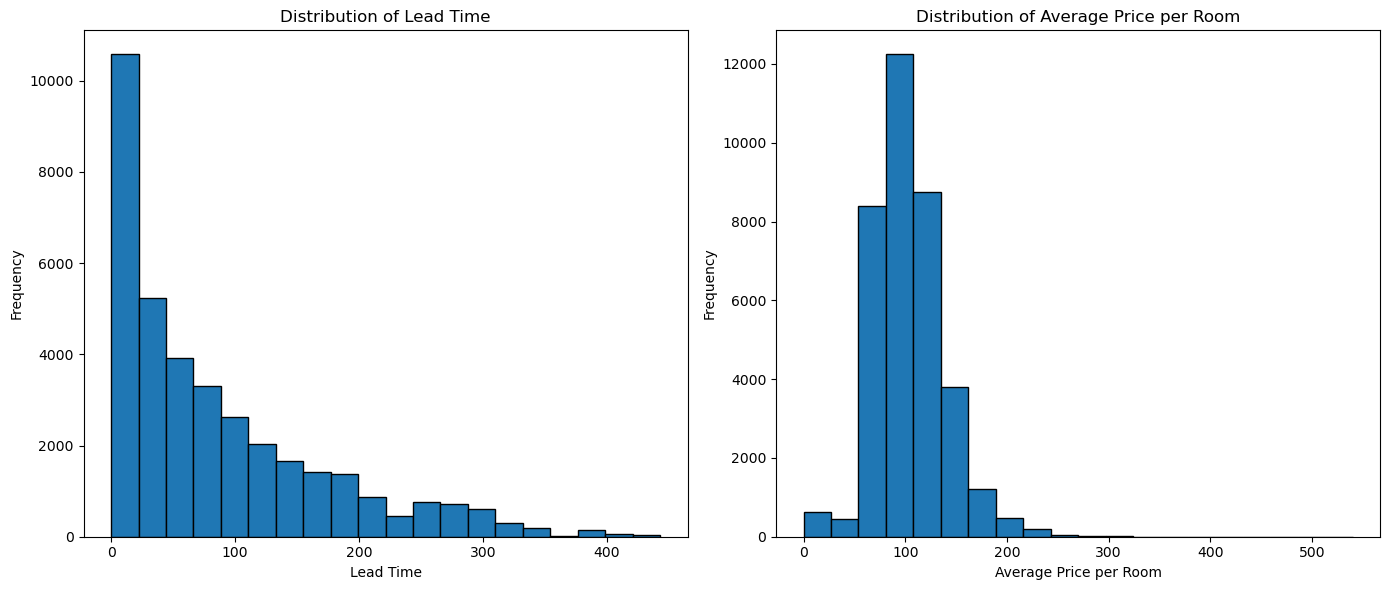

C:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


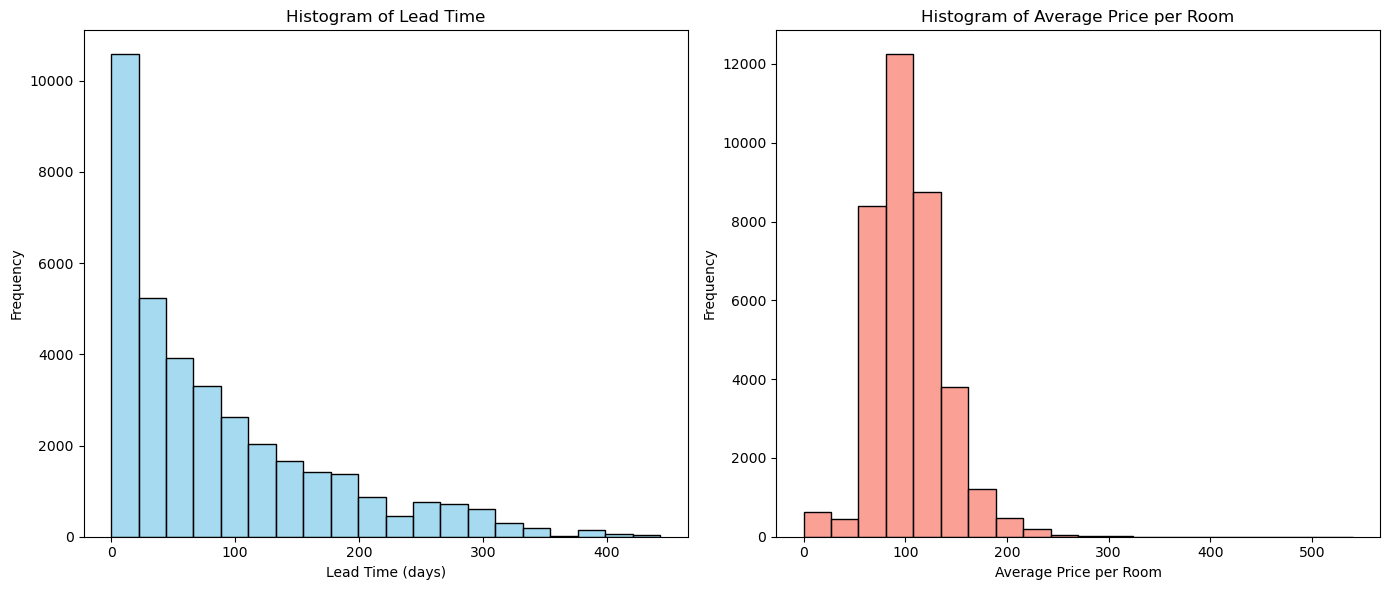

In [43]:
# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns
hotel_data=pd.read_csv("Hotel Reservations.csv")
# If not, you'll need to load your data first

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for lead_time
ax1.hist(hotel_data['lead_time'], bins=20, edgecolor='black')
ax1.set_title('Distribution of Lead Time')
ax1.set_xlabel('Lead Time')
ax1.set_ylabel('Frequency')

# Histogram for avg_price_per_room
ax2.hist(hotel_data['avg_price_per_room'], bins=20, edgecolor='black')
ax2.set_title('Distribution of Average Price per Room')
ax2.set_xlabel('Average Price per Room')
ax2.set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'lead_time'
#with pd.option_context('mode.use_inf_as_na', True):
sns.histplot(hotel_data['lead_time'], bins=20, ax=axs[0], kde=False, color='skyblue')
axs[0].set_title('Histogram of Lead Time')
axs[0].set_xlabel('Lead Time (days)')
axs[0].set_ylabel('Frequency')

# Histogram for 'avg_price_per_room'
sns.histplot(hotel_data['avg_price_per_room'], bins=20, ax=axs[1], kde=False, color='salmon')
axs[1].set_title('Histogram of Average Price per Room')
axs[1].set_xlabel('Average Price per Room')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




In [ ]:
# Question 14
# Write following equations/mathematical formulas in your notebook - 5 times each
# No need to submit answer of this question in your submission
# Just write DONE over here if you have completed this step

# variance
# standard deviation
# Euclidean distance
# cosine distance
# min max scalar
# Normal distribution
#DONE
